Accuracy: 1.0


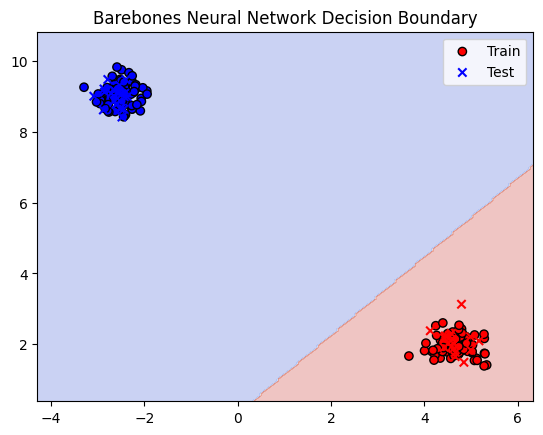

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

np.random.seed(42)
X, y = make_blobs(n_samples=200, centers=2, cluster_std=0.3, random_state=42)
y = y.reshape(-1, 1)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

W1 = np.random.randn(2, 8)
b1 = np.zeros((1, 8))
W2 = np.random.randn(8, 1)
b2 = np.zeros((1, 1))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def relu_deriv(a):
    return (a > 0).astype(float)

lr = 0.05
for _ in range(600):
    z1 = X_train @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    a2 = sigmoid(z2)

    dz2 = a2 - y_train
    dW2 = a1.T @ dz2 / len(X_train)
    db2 = dz2.mean(axis=0, keepdims=True)

    da1 = dz2 @ W2.T
    dz1 = da1 * relu_deriv(a1)
    dW1 = X_train.T @ dz1 / len(X_train)
    db1 = dz1.mean(axis=0, keepdims=True)

    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

z1 = X_test @ W1 + b1
a1 = relu(z1)
z2 = a1 @ W2 + b2
a2 = sigmoid(z2)
preds = (a2 > 0.5).astype(int)
print("Accuracy:", accuracy_score(y_test, preds))

# Plotting decision boundary
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
a1g = relu(grid @ W1 + b1)
a2g = sigmoid(a1g @ W2 + b2)
Z = (a2g > 0.5).astype(int).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train[:,0], X_train[:,1], c=y_train.ravel(), edgecolor='k', cmap='bwr', label="Train")
plt.scatter(X_test[:,0], X_test[:,1], c=y_test.ravel(), marker='x', cmap='bwr', label="Test")
plt.legend()
plt.title("Barebones Neural Network Decision Boundary")
plt.savefig("decision_boundary.png", dpi=300)
plt.show()